#### Diamond Price Prediction

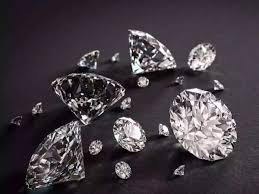

###### I have considered the classic Diamonds dataset which contains the prices and other attributes of almost 54,000 diamonds and this dataset is hosted on Kaggle. The dataset contains 53940 rows and 10 variables. x,y,z represents the length,width and depth simultaniously





#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,\
ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

##### To load the dataset we will be using pd.read_csv()function and it will convert the dataset to a dataframe and have a look into the top 5 rows of dataset using pd.head() function

In [2]:
data=pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Exploratory Data Analysis (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data.shape

(53940, 11)

In [5]:
data.isnull().mean()*100

Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64

##### Drop the column “Unnamed: 0”, which is unnecessary

In [6]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Observed that the minimum value of x (length), y(width) & z(depth) is zero and It doesn’t make any sense to have length\width\depth of a diamond to be zero.

##### Let’s drop these rows

In [8]:
data.dropna()
data.shape

(53940, 10)

In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Plot the distributions of numerical attributes by using hist() method

######  represent the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

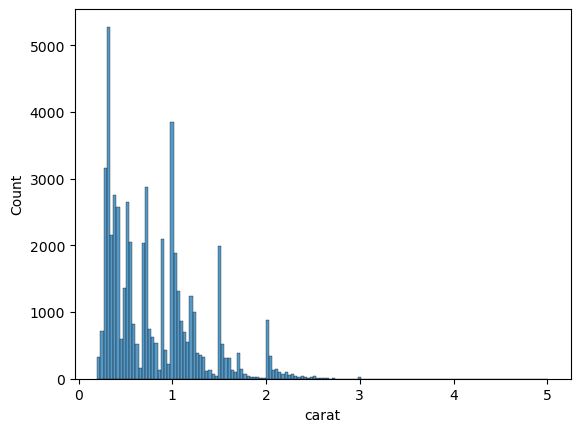

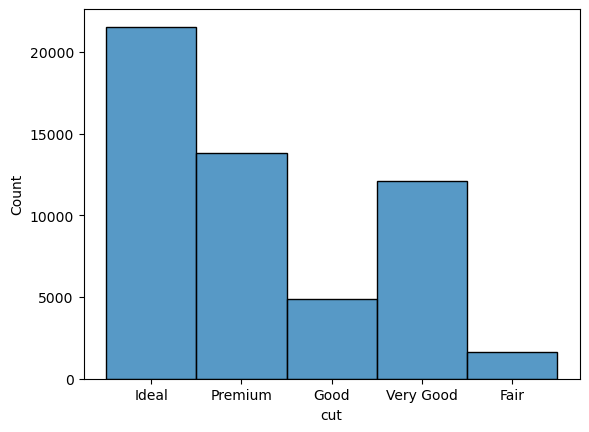

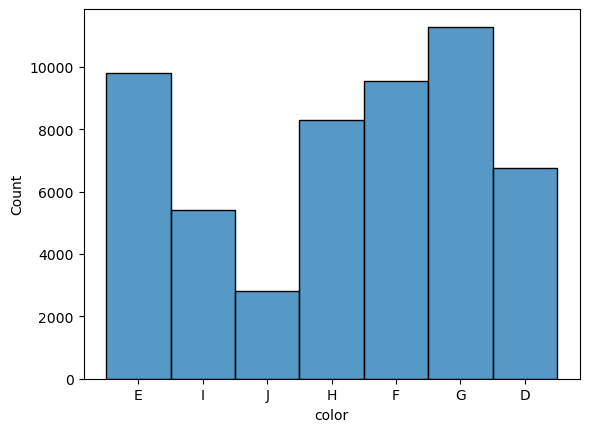

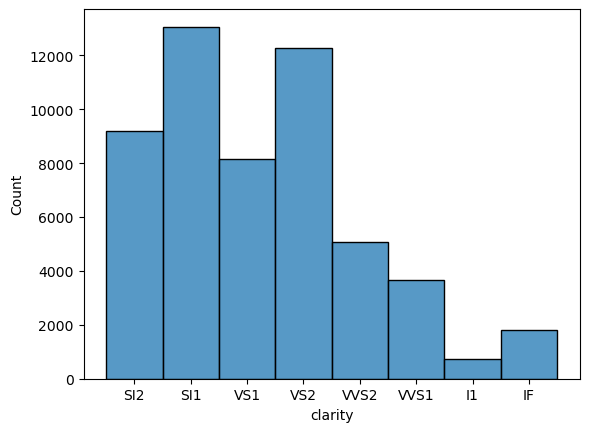

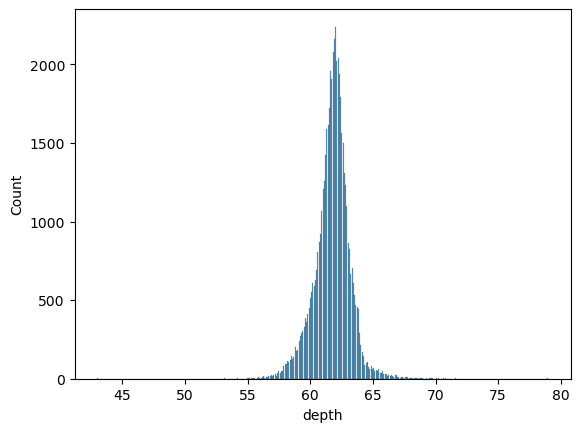

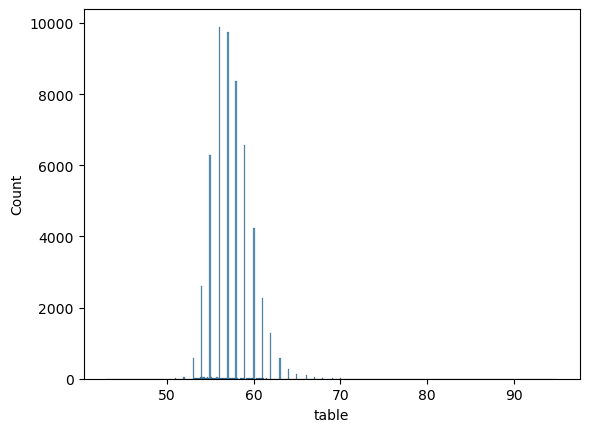

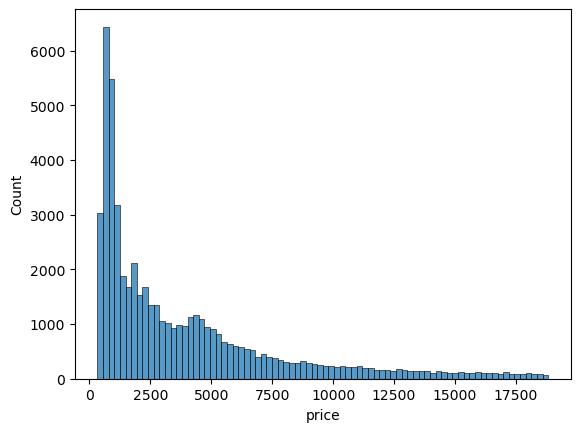

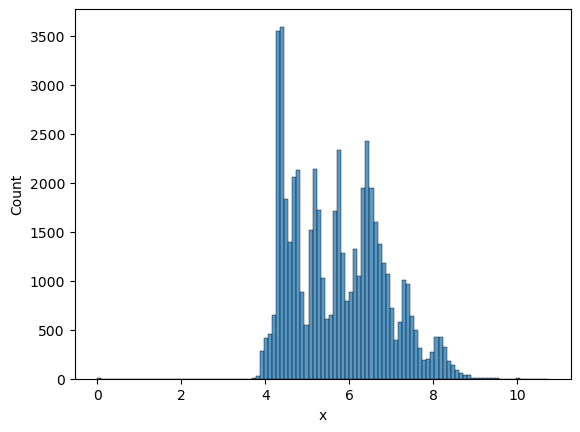

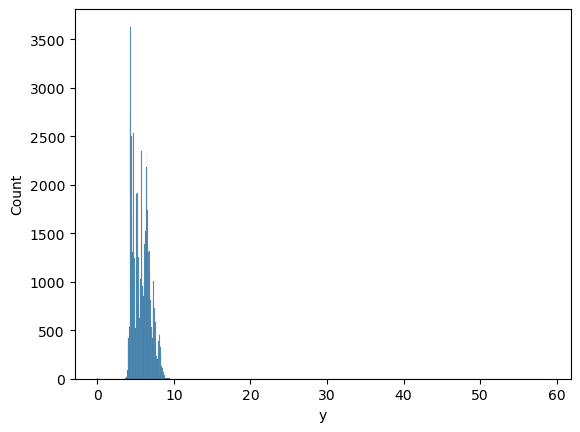

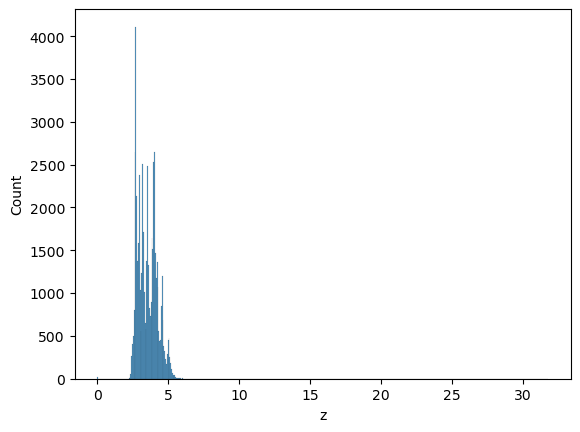

In [10]:
for i in data.columns:
    if data[i].dtypes != "Object":
        sns.histplot(x=data[i])
        plt.show()

#### KDE Plot

##### KDE represents the data using a continuous probability density curve in one or more dimensions

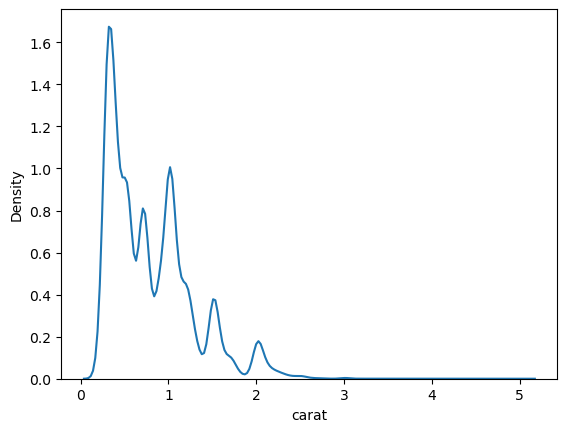

In [11]:
sns.kdeplot("carat",data=data)
plt.show()

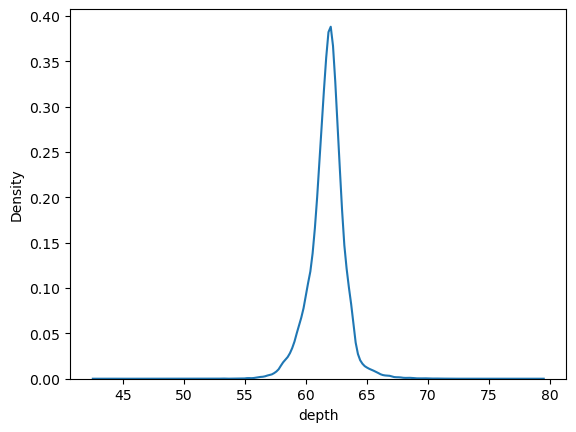

In [12]:
sns.kdeplot("depth",data=data)
plt.show()

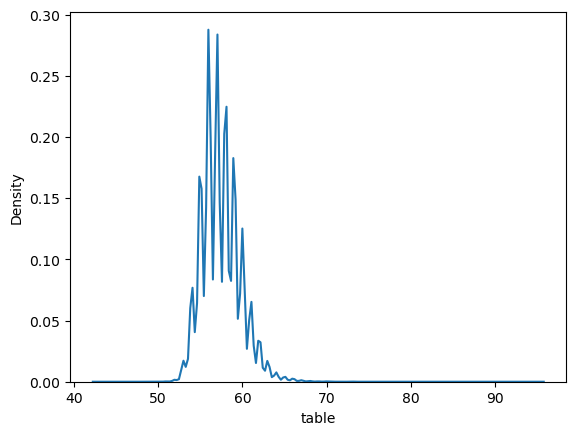

In [13]:
sns.kdeplot("table",data=data)
plt.show()

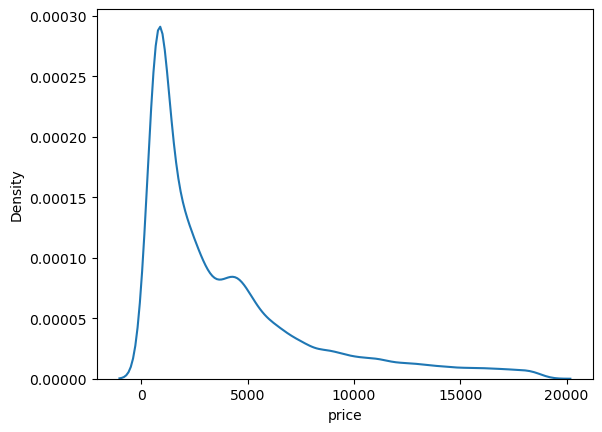

In [14]:
sns.kdeplot("price",data=data)
plt.show()

## Pair Plot

######  Pair plot allows us to see both the distribution of variables and also the relationships between two variables

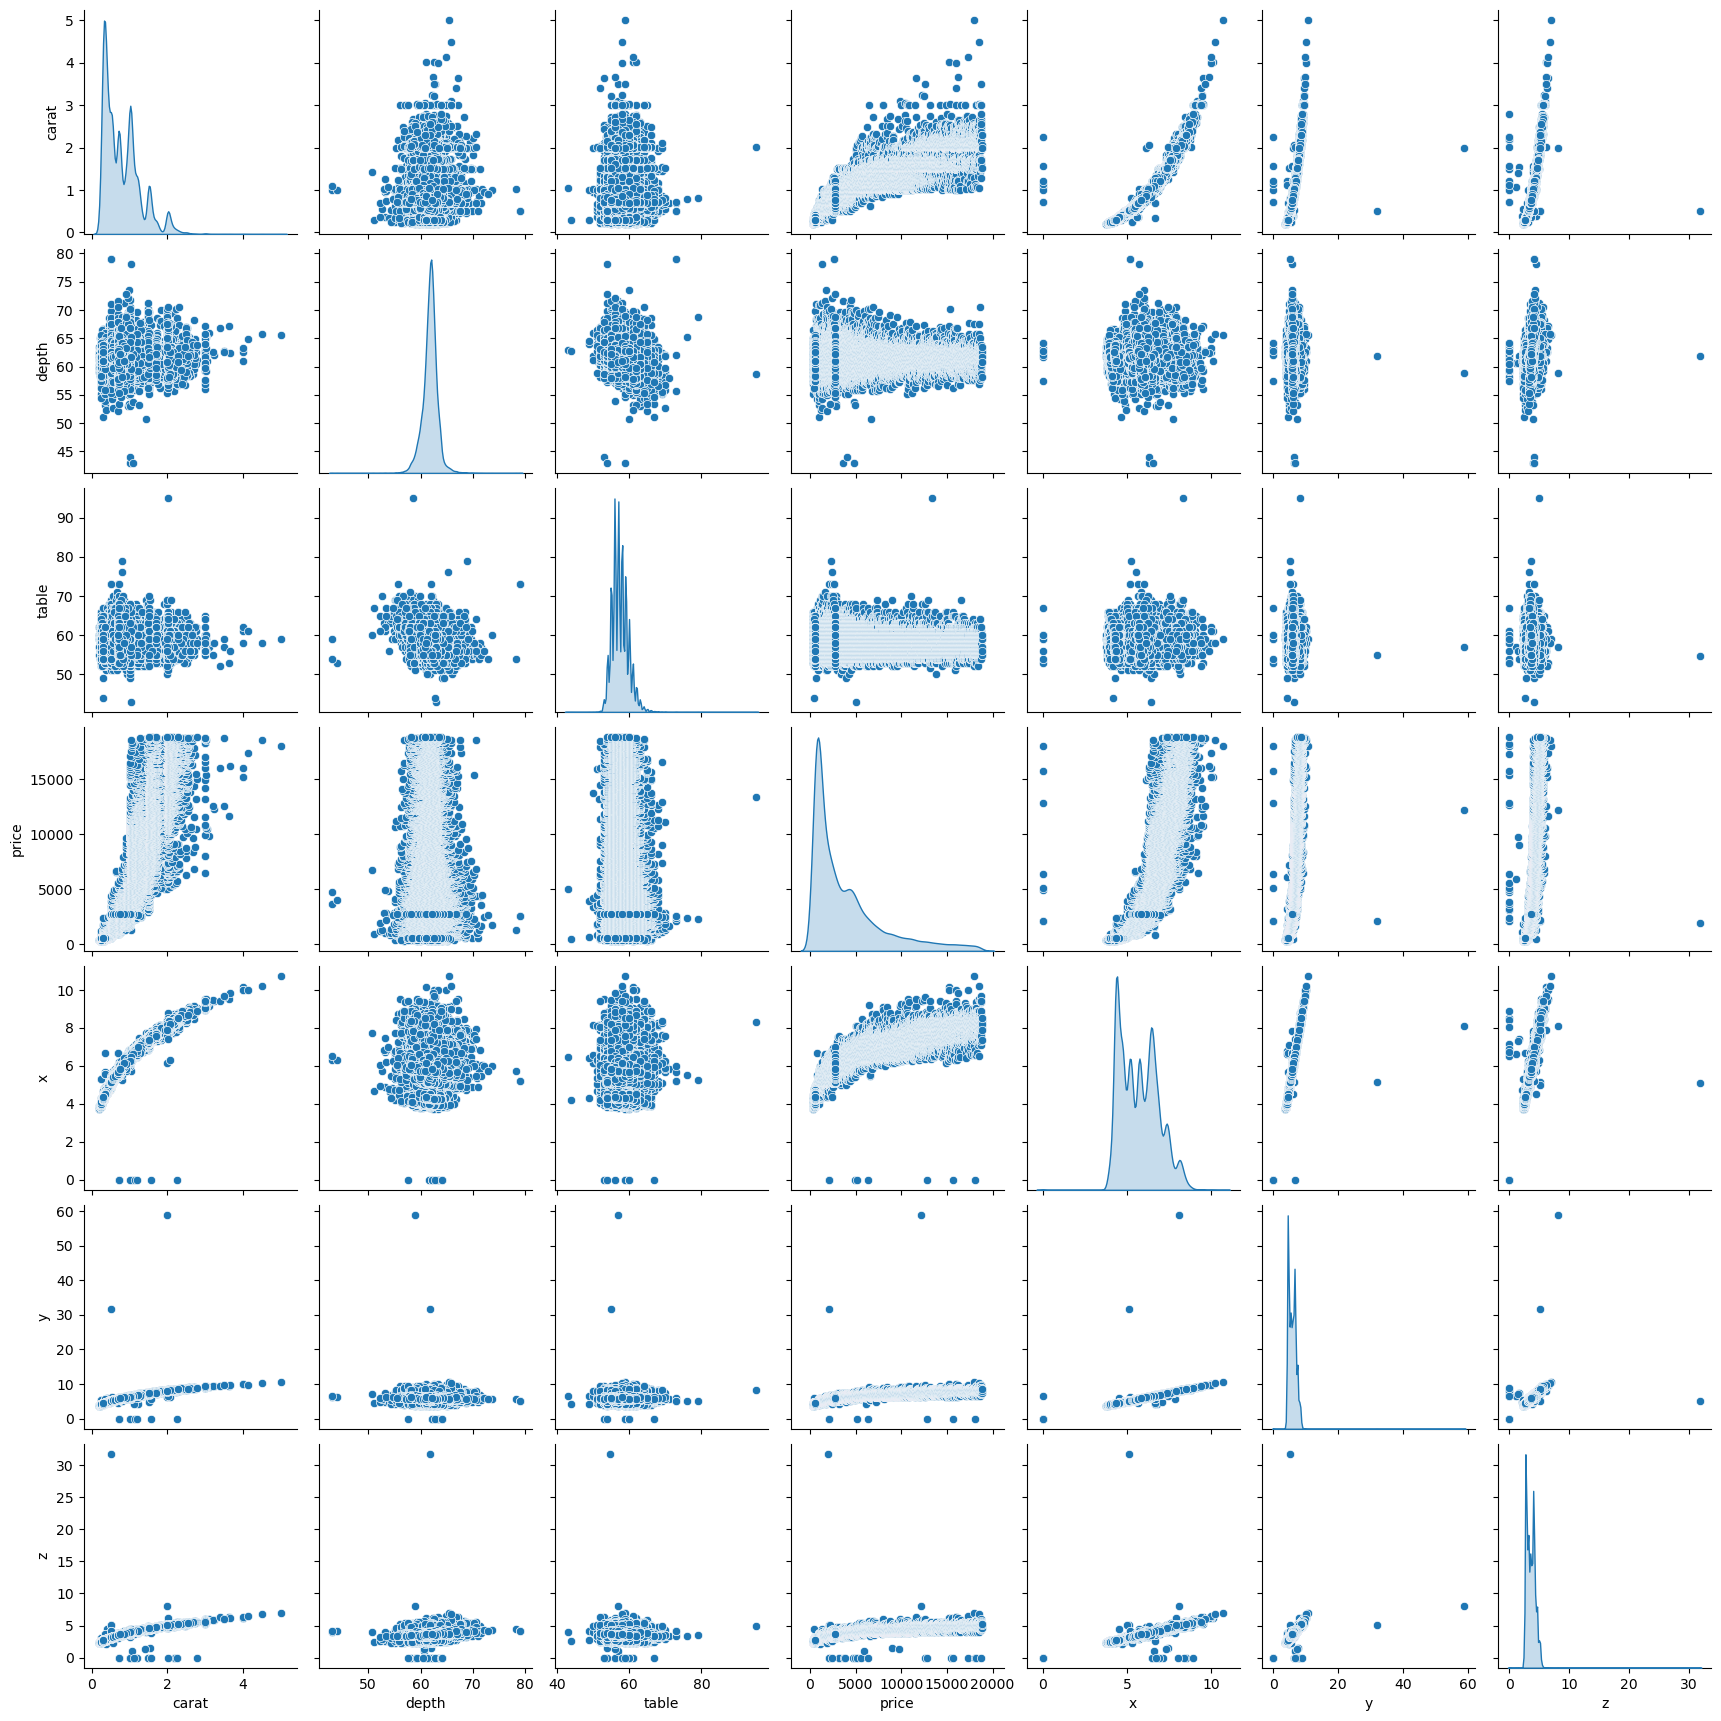

In [15]:
sns.pairplot(data , diag_kind = 'kde');

### Catplot

#### Let’s have a sense of categorical features with respect to target (price) variable by using box plots

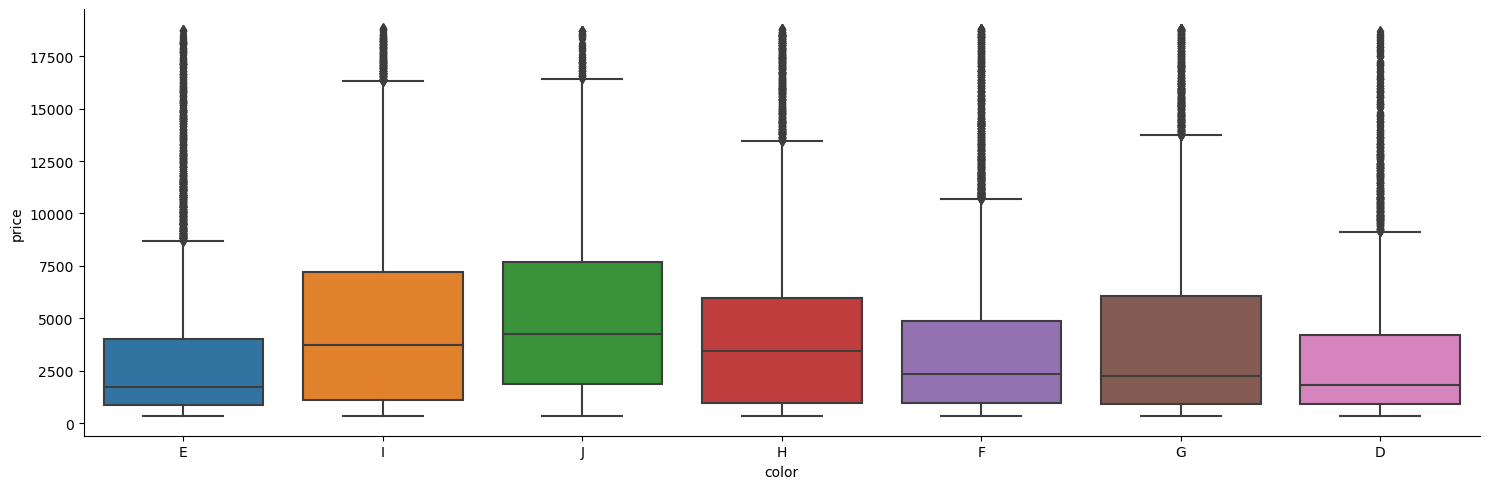

In [16]:

sns.catplot(x="color", y="price",kind="box", dodge=False, height = 5, aspect = 3,data=data);
    

### Box Plot

##### Boxplots are a measure of how well distributed the data in a data set is. It divides the data set into three quartiles. This graph represents the minimum, maximum, median, first quartile and third quartile in the data set.

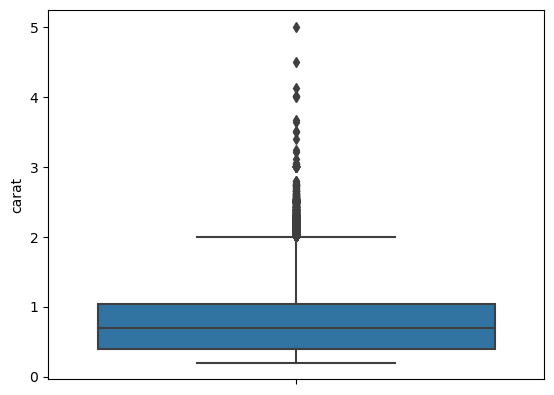

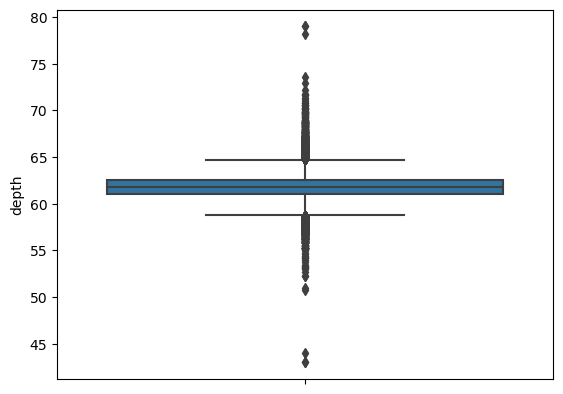

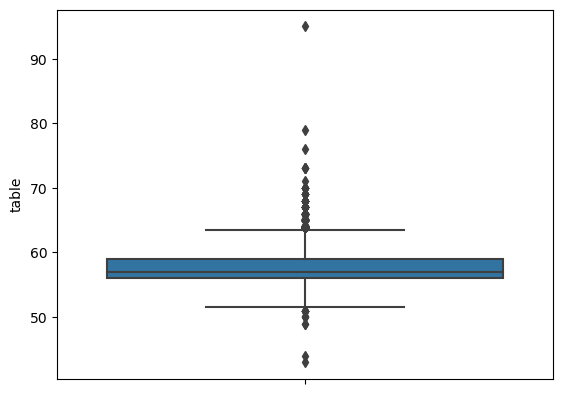

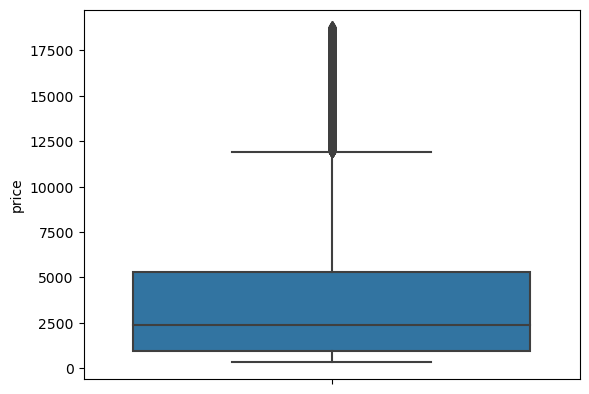

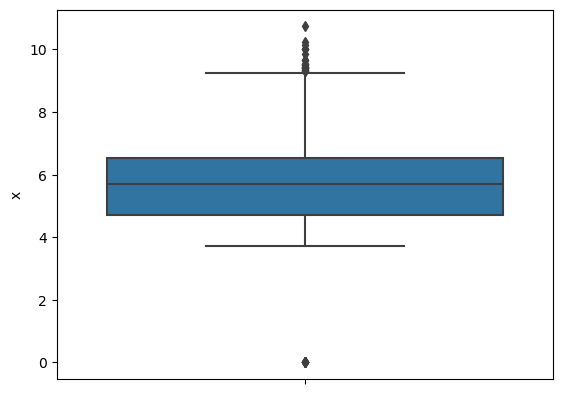

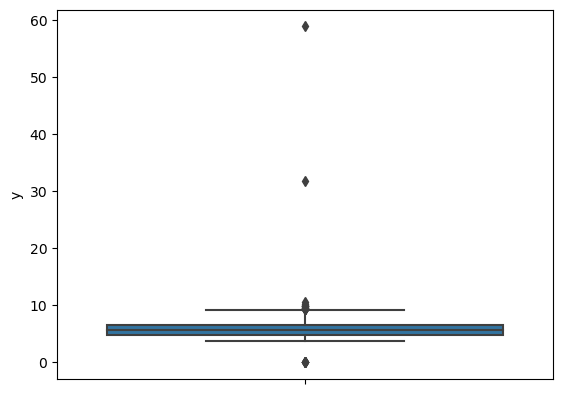

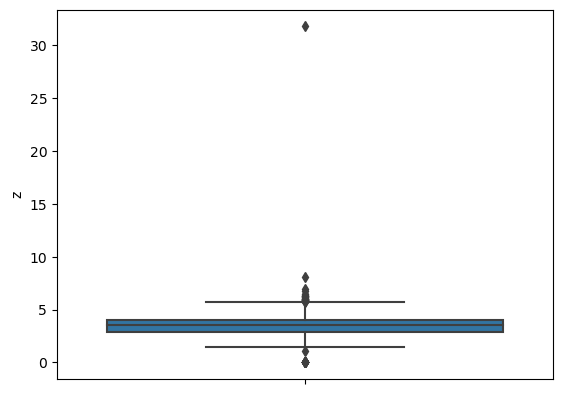

In [17]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y=data[i])
        plt.show()

#### Here we can see that lot of outliers. so we need to treat the outliers using Three sigma rule (or) outlier treatment

In [18]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [19]:
for i in data.columns:
    if data[i].dtype !="object":
        UL,LL=outlier_limit(data[i])
        data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])

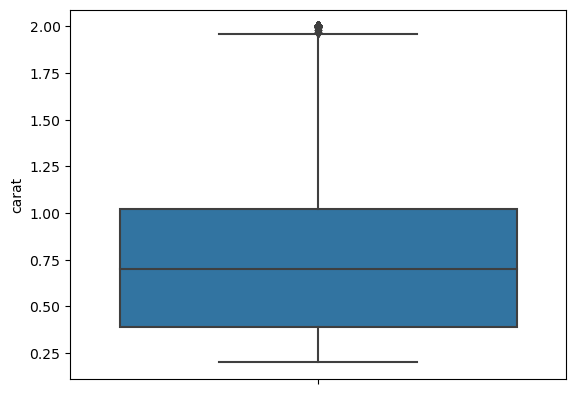

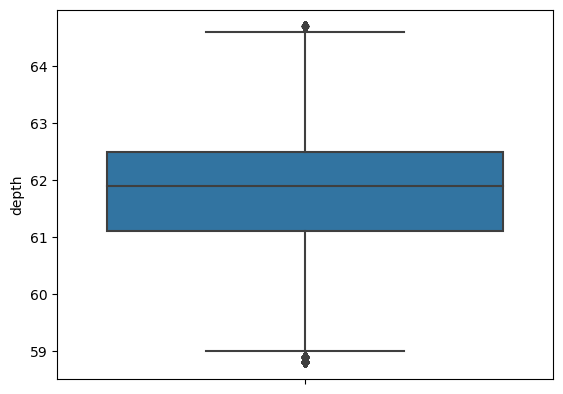

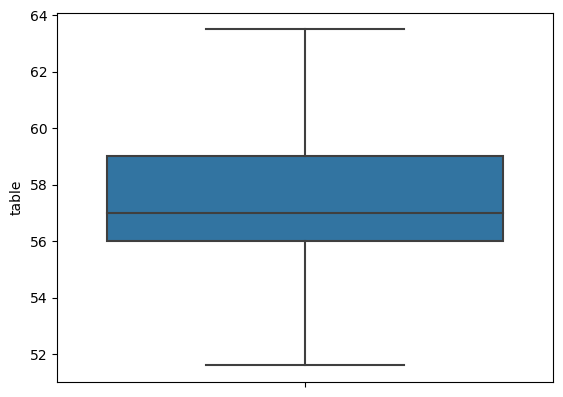

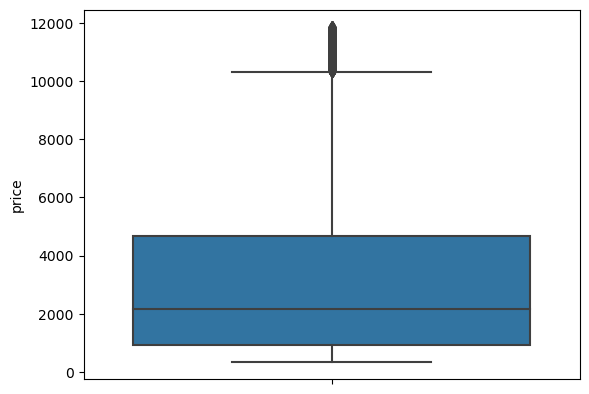

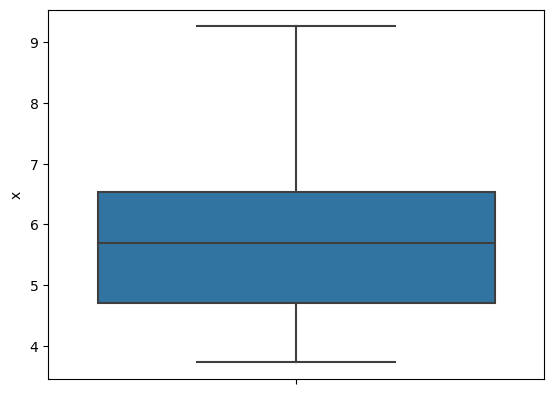

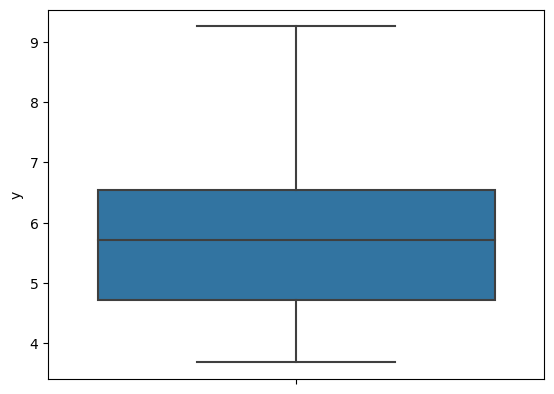

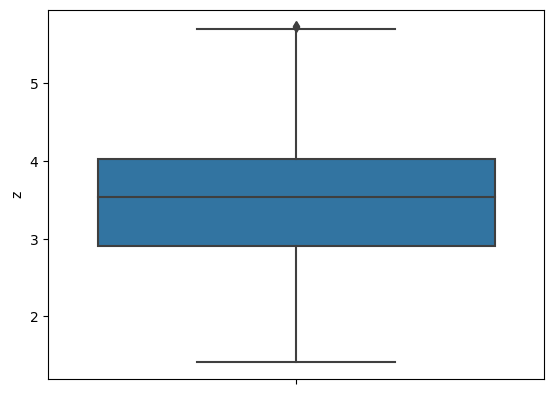

In [20]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y=data[i])
        plt.show()

#### After the outlier treatment the outliers are removed. But some nan values are occured during the outlier treatment.we drop the nan values using dropna() function

In [21]:
data.dropna(inplace=True)

### Label encoding the catergorical variables

In [22]:
le=LabelEncoder()

In [23]:
data["cut"]=le.fit_transform(data["cut"])
data["color"]=le.fit_transform(data["color"])
data["clarity"]=le.fit_transform(data["clarity"])

### HeatMap

<AxesSubplot:>

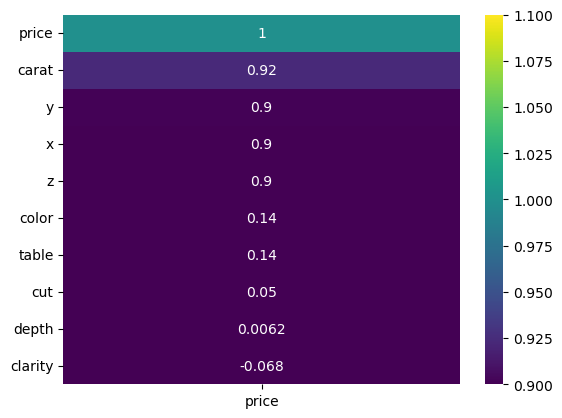

In [24]:
sns.heatmap(data.corr()[['price']].sort_values(by="price",ascending=False),vmin=1,vmax=1,annot=True,cmap='viridis')

In [25]:
data.corr()[["price"]].sort_values(by="price",ascending=False)

,price
price,1.000000
carat,0.922932
y,0.900985
x,0.899843
z,0.896579
color,0.140451
table,0.136834
cut,0.050275
depth,0.006180
clarity,-0.068051


#### Lets take only the columns with good correlation with the target

In [26]:
x=data[["carat","y","x","z"]].values

In [27]:
y=data[["price"]].values

### Feature Scaling

In [28]:
rs=RobustScaler()

In [29]:
x=rs.fit_transform(x)

#### Selecting the model using Cross Validation

In [30]:
models=({
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
   " DecisionTreeRegressor":DecisionTreeRegressor(),
   " GradientBoostingRegressor":GradientBoostingRegressor(),
   " AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
})

In [31]:
for name,model in models.items():
    scores = cross_val_score(model,x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model :{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print("Average RMSe: ",rmse_average)
    print("*"*100)

cross validation model :LinearRegression
Average RMSe:  949.0082607597151
****************************************************************************************************
cross validation model :Ridge
Average RMSe:  949.0373553927391
****************************************************************************************************
cross validation model :LinearSVR
Average RMSe:  998.036819893905
****************************************************************************************************
cross validation model : DecisionTreeRegressor
Average RMSe:  1351.3184405412844
****************************************************************************************************
cross validation model : GradientBoostingRegressor
Average RMSe:  1030.162195164327
****************************************************************************************************
cross validation model : AdaBoostRegressor
Average RMSe:  1125.8224782108466
**************************************************

#### From the cross validation score we find that LinearRegression have the least Average RMSE value, So lets select the LinearRegressor for the modeling.

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [33]:
model=LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
training_score=model.score(x_train,y_train)
training_score

0.8582563581537332

In [36]:
testing_score=model.score(x_test,y_test)
testing_score

0.8608078415776681

In [37]:
y_pred= model.predict(x)

In [38]:
R2_Score=r2_score(y,y_pred)*100
R2_Score

85.87604289665714

In [39]:
Prediction=pd.DataFrame(zip(y,y_pred),columns=('Actual','Predicted'),dtype=float)
Prediction

,Actual,Predicted
0,326.0,326.087072
1,326.0,171.613162
2,334.0,539.449064
3,335.0,462.119891
4,336.0,312.856370
...,...,...
47519,2757.0,3085.557611
47520,2757.0,2999.930846
47521,2757.0,2803.436225
47522,2757.0,3928.255092


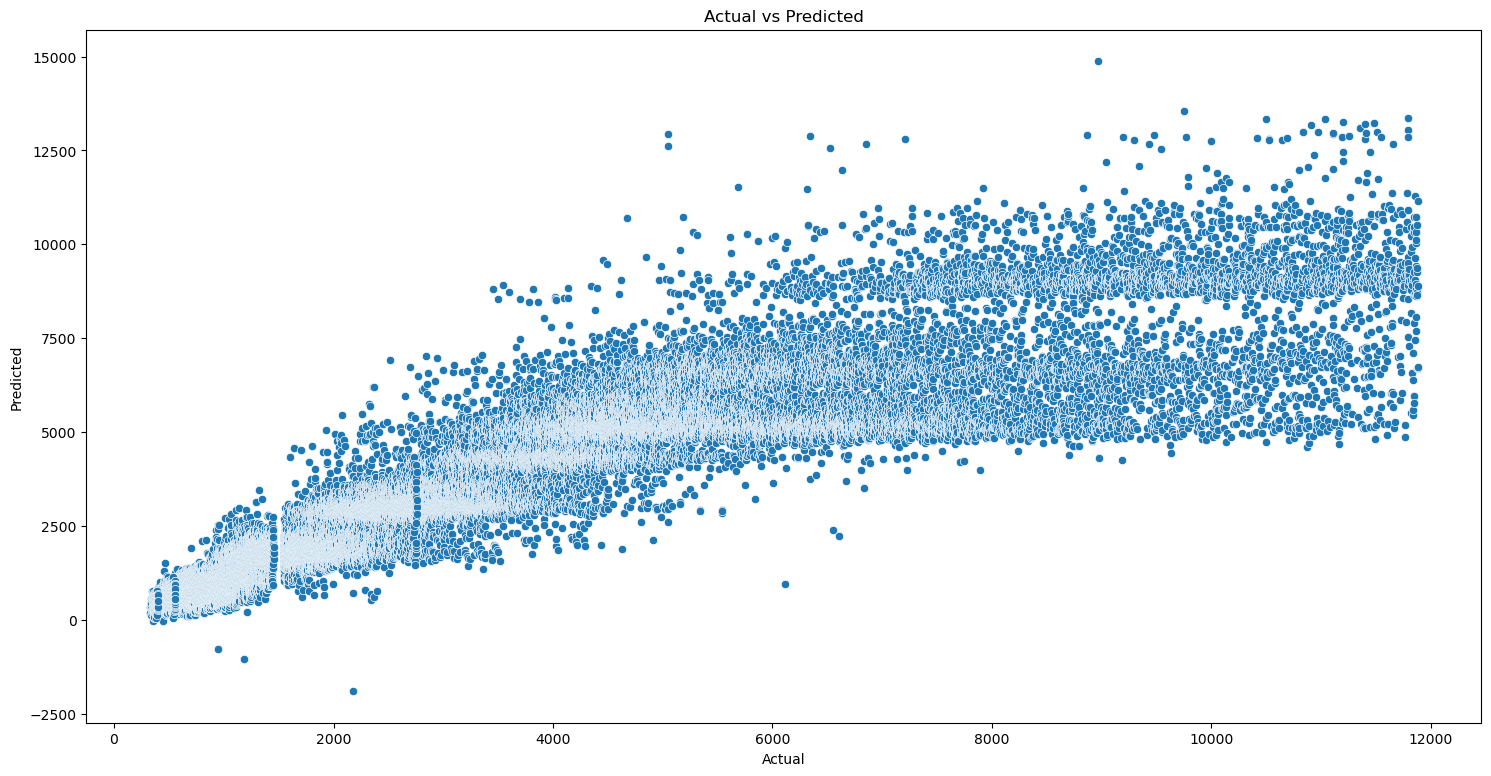

In [40]:
plt.figure(figsize=(18,9))
plt.title("Actual vs Predicted")
sns.scatterplot(data=Prediction,x="Actual",y="Predicted")
plt.show()